<a href="https://colab.research.google.com/github/mmalik17/data-analysis-python/blob/main/Data-Science-Job-Data/Data_Science_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd

In [11]:
company = pd.read_csv('https://raw.githubusercontent.com/mmalik17/data-analysis-python/main/Data-Science-Job-Data/title_location_company_salary.csv')

In [12]:
# 1. DATA UNDERSTANDING

In [13]:
company

,Unnamed: 0,Title,Company,Location,Salary,Levels
0,0,Data Scientist,Numerdox,"Sacramento, CA",110000.0,Jr.
1,1,Data Analyst,Cepheid,"Lodi, CA",120000.0,Unknown
2,2,Data Scientist,Cepheid,"Sunnyvale, CA",150000.0,Staff
3,3,Data Scientist,Verana Health,"San Francisco, CA",150000.0,Unknown
4,4,Data Scientist,Tinder,"San Francisco, CA",130000.0,Jr.
...,...,...,...,...,...,...
1282,1282,Data Scientist,PayPal,"San Jose, CA",82000.0,Unknown
1283,1283,Software Engineer,NVIDIA,"Santa Clara, CA",160000.0,Sr.
1284,1284,Data Scientist,Afterpay Touch,"San Francisco, CA",130000.0,Staff
1285,1285,Director of Data Science,Anthem,"San Francisco, CA",200000.0,Unknown


In [14]:
#the first column need to be dropped

In [15]:
company.shape

(1287, 6)

In [16]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1287 non-null   int64  
 1   Title       1287 non-null   object 
 2   Company     1285 non-null   object 
 3   Location    1116 non-null   object 
 4   Salary      1209 non-null   float64
 5   Levels      1287 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 60.5+ KB


In [17]:
company.describe()

,Unnamed: 0,Salary
count,1287.000000,1209.000000
mean,643.000000,150969.914806
std,371.669208,33377.154151
min,0.000000,0.000000
25%,321.500000,130000.000000
50%,643.000000,150000.000000
75%,964.500000,170000.000000
max,1286.000000,434000.000000


In [18]:
company.nunique()

Unnamed: 0    1287
Title           13
Company        527
Location        81
Salary          56
Levels           7
dtype: int64

In [19]:
# 2. DATA CLEANING AND PREPARATION

In [20]:
#2.1 Drop the unused column
company.drop(columns='Unnamed: 0',axis=1, inplace=True)
company.head()

,Title,Company,Location,Salary,Levels
0,Data Scientist,Numerdox,"Sacramento, CA",110000.0,Jr.
1,Data Analyst,Cepheid,"Lodi, CA",120000.0,Unknown
2,Data Scientist,Cepheid,"Sunnyvale, CA",150000.0,Staff
3,Data Scientist,Verana Health,"San Francisco, CA",150000.0,Unknown
4,Data Scientist,Tinder,"San Francisco, CA",130000.0,Jr.


In [21]:
#2.2 Check and remove duplicated data 
company.duplicated().sum()

342

In [22]:
company.drop_duplicates(inplace=True)

In [23]:
company.duplicated().sum()

0

In [24]:
company

,Title,Company,Location,Salary,Levels
0,Data Scientist,Numerdox,"Sacramento, CA",110000.0,Jr.
1,Data Analyst,Cepheid,"Lodi, CA",120000.0,Unknown
2,Data Scientist,Cepheid,"Sunnyvale, CA",150000.0,Staff
3,Data Scientist,Verana Health,"San Francisco, CA",150000.0,Unknown
4,Data Scientist,Tinder,"San Francisco, CA",130000.0,Jr.
...,...,...,...,...,...
1281,Data Scientist,Atlassian,"Mountain View, CA",180000.0,Principal
1282,Data Scientist,PayPal,"San Jose, CA",82000.0,Unknown
1283,Software Engineer,NVIDIA,"Santa Clara, CA",160000.0,Sr.
1284,Data Scientist,Afterpay Touch,"San Francisco, CA",130000.0,Staff


In [25]:
#2.3 Check missing data
company.isnull().sum()

Title         0
Company       2
Location    146
Salary       61
Levels        0
dtype: int64

In [26]:
#The title and company column should have a value. Remove rows where company column is null
company.dropna(subset=['Company'], inplace=True)

In [27]:
company.isnull().sum()

Title         0
Company       0
Location    144
Salary       61
Levels        0
dtype: int64

In [ ]:
#3 RELATIONSHIP ANALYSIS

In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


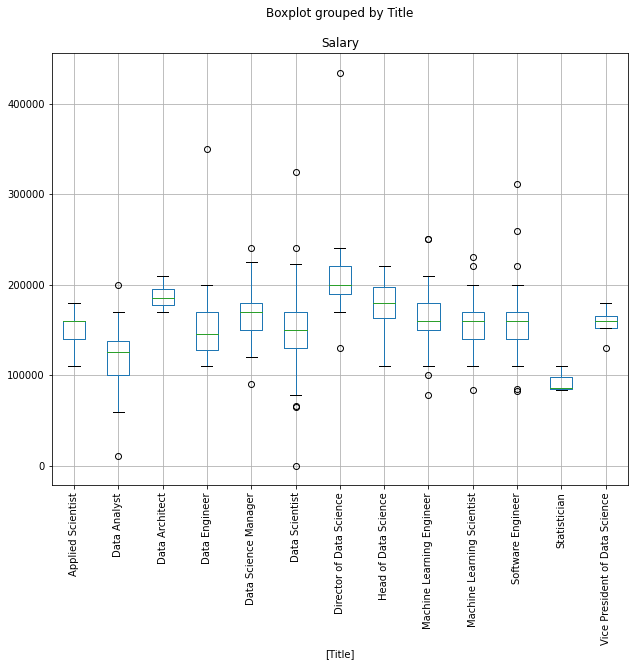

In [30]:
#relation between job Title and Salary
company.boxplot(column=['Salary'], by=['Title'], rot=90, figsize=(10,8))

from boxplot above, the title with the highest salary (measured by mean, lower quartile, and upper quartile) is the Director of Data Science, while the lowest one is Statistician

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


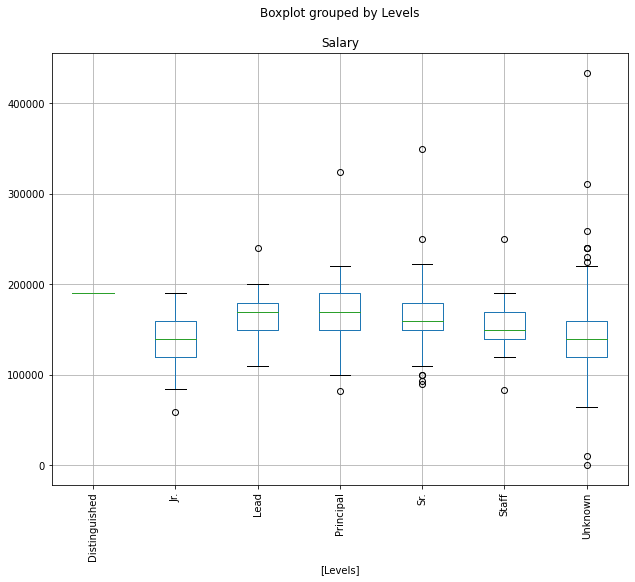

In [31]:
#relation between job Levels and Salary
company.boxplot(column=['Salary'], by=['Levels'], rot=90, figsize=(10,8))

from boxplot above, the salary range of Junior Level (lowest) is between 80,000 to 190,000 while the salary range of Senior Level (highest) is between 110,000 to 230,000 

In [47]:
#relationship between company and salary
row_comp = []
for comp in company['Company'].unique():
  meansalary = company.loc[company['Company'] == comp]['Salary'].mean()
  dict_comp = {'Company':comp, 'Average Salary':meansalary}
  row_comp.append(dict_comp)

comp_sal = pd.DataFrame(row_comp)
comp_sal.sort_values(['Average Salary'], ascending=False, inplace=True)
comp_sal

,Company,Average Salary
116,AiCard,350000.0
6,Indeed,301000.0
104,Grammarly,285000.0
211,Vertex Pharmaceuticals,240000.0
103,Checkmate Partners,225000.0
...,...,...
406,Gap Inc.,NaN
430,Pinnacle Group,NaN
441,Amgen,NaN
480,Labcorp,NaN


We want to see the lowest average salary, so we need to remove the null values.

In [49]:
comp_sal.isnull().sum()

Company            0
Average Salary    25
dtype: int64

In [50]:
comp_sal.dropna()

,Company,Average Salary
116,AiCard,350000.0
6,Indeed,301000.0
104,Grammarly,285000.0
211,Vertex Pharmaceuticals,240000.0
103,Checkmate Partners,225000.0
...,...,...
336,iMerit,78000.0
433,Edmunds.com,66000.0
124,REDICA Systems,59000.0
125,Kett Engineering,10400.0


The highest average salary per company is AiCard, while the lowest one is Kett Engineering

In [33]:
company['Location'].nunique()

81

In [48]:
#relationship between location and salary
row_city = []
for city in company['Location'].unique():
  averagesalary = company.loc[company['Location'] == city]['Salary'].mean()
  dict_city = {'City':city, 'Average Salary':averagesalary}
  row_city.append(dict_city)

city_sal = pd.DataFrame(row_city)
city_sal.sort_values(['Average Salary'], ascending=False, inplace=True)
city_sal

,City,Average Salary
64,"California City, CA",195000.0
27,"Fountain Valley, CA",180000.0
70,"Carpinteria, CA",180000.0
77,"Fresno, CA",180000.0
55,"Burlingame, CA",180000.0
...,...,...
7,NaN,NaN
34,"Duarte, CA",NaN
62,"East Palo Alto, CA",NaN
75,"Thousand Oaks, CA",NaN


We want to see the lowest average salary, so we need to remove the null values.

In [45]:
city_sal.isnull().sum()

City              1
Average Salary    5
dtype: int64

In [46]:
city_sal.dropna()

,City,Average Salary
64,"California City, CA",195000.0
27,"Fountain Valley, CA",180000.0
70,"Carpinteria, CA",180000.0
77,"Fresno, CA",180000.0
55,"Burlingame, CA",180000.0
...,...,...
1,"Lodi, CA",110000.0
18,"Oakland, CA",110000.0
81,"Ventura, CA",110000.0
39,"Glendale, CA",97000.0


The highest average salary per city is California City, while the lowest one is San Clemente